#📌 Extracción

In [1]:
##

In [2]:
import pandas as pd

In [3]:
# URL de la API
url_api = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"

# Carga de datos desde la API para convertirlo en un DataFrame de Pandas
datos = pd.read_json(url_api)

# Primera visualizacion
datos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

## Conociendo el conjunto de datos


In [4]:
#  Explorar las columnas
datos.columns.tolist()

['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']

In [5]:
# y sus tipos de dato
datos.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


In [6]:
# Informacion general del DataFrame
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


De las 6 columnas presentes en el dataset, 4 contienen datos anidados, por lo tanto es necesario normalizarlas para extraer informacion de las columnas y dejar los datos listos para la evaluación

## Normalización de las columnas

In [7]:
churn_id = datos[['customerID', 'Churn']]
churn_id

,customerID,Churn
0,0002-ORFBO,No
1,0003-MKNFE,No
2,0004-TLHLJ,Yes
3,0011-IGKFF,Yes
4,0013-EXCHZ,Yes
...,...,...
7262,9987-LUTYD,No
7263,9992-RRAMN,Yes
7264,9992-UJOEL,No
7265,9993-LHIEB,No


In [8]:
customer_df = pd.json_normalize( datos[ 'customer']  )
phone_df = pd.json_normalize( datos[ 'phone'] )
internet_dt = pd.json_normalize( datos[ 'internet' ])
account_df = pd.json_normalize( datos[  'account'] )

datos_n = pd.concat([

    churn_id,
    customer_df,
    phone_df,
    internet_dt,
    account_df

], axis = 1 )


datos_n.sample(5)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
352,0511-JTEOY,Yes,Female,0,No,No,1,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,No,Mailed check,71.10,71.1
509,0723-FDLAY,No,Male,0,No,No,44,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),85.25,3704.15
4811,6586-PSJOX,No,Male,0,No,Yes,15,Yes,No,DSL,...,No,Yes,Yes,No,No,One year,No,Credit card (automatic),55.20,864.55
2546,3551-HUAZH,Yes,Male,1,No,No,1,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.40,74.4
167,0265-EDXBD,Yes,Male,1,Yes,No,32,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.90,2303.35


In [9]:
# Revisamos informacion de las columnas
datos_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [10]:
datos_n.columns.tolist()

['customerID',
 'Churn',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Charges.Monthly',
 'Charges.Total']

In [11]:
datos_n.dtypes

,0
customerID,object
Churn,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


#### Diccionario de datos

- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: tipo de contrato
- `PaperlessBilling`: si el cliente prefiere recibir la factura en línea
- `PaymentMethod`: forma de pago
- `Charges.Monthly`: total de todos los servicios del cliente por mes
- `Charges.Total`: total gastado por el cliente

**Identificacion de columnas mas relevantes**:

**Churn**: Esta columna te dice directamnte si el cliente dejo la empresa o no, con un "Yes" o "No" respectivamente.

**Contract**: El tipo de contrato, un contrato corto puede asociarse a una mayor rotación.

**Charges Monthly y Total**: Informacion crucial financiera del cliente con la empresa, puede determinar o influir en la decisión de cancelar




## Comprobación de incoherencias en los datos

Comprobación de datos nulos, duplicados, únicos y valores nulos en los textos

In [12]:
#Comprobar valores nulos exactos

valores_nulos = datos_n.isnull().sum()
valores_nulos

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [13]:
# Duplicados

duplicados = datos_n.duplicated().sum()
duplicados

np.int64(0)

In [14]:
# Valores únicos en cada columna

for columna in datos_n.columns:
    print(f"\nValores únicos en '{columna}':")
    print(datos_n[columna].unique())


Valores únicos en 'customerID':
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Valores únicos en 'Churn':
['No' 'Yes' '']

Valores únicos en 'gender':
['Female' 'Male']

Valores únicos en 'SeniorCitizen':
[0 1]

Valores únicos en 'Partner':
['Yes' 'No']

Valores únicos en 'Dependents':
['Yes' 'No']

Valores únicos en 'tenure':
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]

Valores únicos en 'PhoneService':
['Yes' 'No']

Valores únicos en 'MultipleLines':
['No' 'Yes' 'No phone service']

Valores únicos en 'InternetService':
['DSL' 'Fiber optic' 'No']

Valores únicos en 'OnlineSecurity':
['No' 'Yes' 'No internet service']

Valores únicos en 'OnlineBackup':
['Yes' 'No' 'No internet service']

Valores únicos en 'DeviceProtection':
['No' 'Yes' 'No internet service']

Valores ú

In [15]:
# Valores nulos

valores_nulos = datos_n.apply(lambda x:x.astype(str).str.strip() == '').sum()
print("Valores o strings vacíos por columna:")
print(valores_nulos[valores_nulos>0])


Valores o strings vacíos por columna:
Churn            224
Charges.Total     11
dtype: int64


In [16]:
# Inconsistencias
datos_n['Churn'].unique()
# Volvemos a confirmar que hay espacios vacios

array(['No', 'Yes', ''], dtype=object)

In [17]:
datos_n['Charges.Total'].unique()
# Inconsistencia en el tipo de dato de la columna

array(['593.3', '542.4', '280.85', ..., '742.9', '4627.65', '3707.6'],
      dtype=object)

**No se detecto valores nulos ni filas duplicadas, pero si se encontró inconsistencias en las columnas y espacios vacios**

## Manejo de inconsistencias

In [18]:
## Eliminar las filas con espacios vacios de la columna "Churn" y "Charges.Total"

# Verificar cuantas filas cuentan con esta condicion de cada respectiva columna
cant_vacias_churn = (datos_n['Churn'] == '').sum()
cant_vacias_charges = (datos_n['Charges.Total'].astype(str).str.strip() == '').sum()

print(f"\nLa cantidad de filas vacias en la columna Churn son {cant_vacias_churn}")
print(f"\nLa cantidad de filas vacias en la columna Charges Total son {cant_vacias_charges}")

# Eliminamos esas filas creando un nuevo dataframe sin estas filas

datos_limpio = datos_n.loc[(datos_n['Churn'] != '') & (datos_n['Charges.Total'].astype(str).str.strip() != '') ].copy()


# Comparamos y verificamos el tamaño del dataframe luego de la limpieza, y valores unicos de cada uno

print(f"\nTamaño anterior del dataframe: {datos_n.shape[0]} filas, Tamaño nuevo: {datos_limpio.shape[0]} filas")

print("\nValores unicos en 'Churn':")
print(datos_limpio['Churn'].unique())

print("\nValores unicos en 'Charges.Total':")
print(datos_limpio['Charges.Total'].unique())





La cantidad de filas vacias en la columna Churn son 224

La cantidad de filas vacias en la columna Charges Total son 11

Tamaño anterior del dataframe: 7267 filas, Tamaño nuevo: 7032 filas

Valores unicos en 'Churn':
['No' 'Yes']

Valores unicos en 'Charges.Total':
['593.3' '542.4' '280.85' ... '742.9' '4627.65' '3707.6']


In [19]:
## Volvemos a verificar si hay valores vacios
valores_nulos_2 = datos_limpio.apply(lambda x:x.astype(str).str.strip() == '').sum()
print("Valores o strings vacíos por columna:")
print(valores_nulos_2[valores_nulos_2>0])

Valores o strings vacíos por columna:
Series([], dtype: int64)


In [20]:
# Transformamos el tipo de dato de la columna "Charges Total" a un tipo de dato Float.
datos_limpio['Charges.Total'] = datos_limpio['Charges.Total'].astype(float)

In [21]:
# Verificamos
datos_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   object 
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   int64  
 4   Partner           7032 non-null   object 
 5   Dependents        7032 non-null   object 
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   object 
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  Contract          7032 non-null   object 
 17  

## Columna de cuentas diarias

In [22]:
dias_mes_promedio = 30
datos_limpio['Cuentas_Diarias'] = datos_limpio['Charges.Monthly'] / dias_mes_promedio
datos_limpio[['Charges.Monthly', 'Cuentas_Diarias']].sample(5)

,Charges.Monthly,Cuentas_Diarias
3682,50.80,1.693333
6777,78.80,2.626667
401,97.95,3.265000
4601,49.90,1.663333
5791,59.75,1.991667


In [23]:
datos_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   object 
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   int64  
 4   Partner           7032 non-null   object 
 5   Dependents        7032 non-null   object 
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   object 
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  Contract          7032 non-null   object 
 17  

#📊 Carga y análisis

## Análisis Descriptivo

In [24]:
# Estadisticas para columnas numericas
datos_limpio.describe()

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Cuentas_Diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,2.159940
std,0.368844,24.545260,30.085974,2266.771362,1.002866
min,0.000000,1.000000,18.250000,18.800000,0.608333
25%,0.000000,9.000000,35.587500,401.450000,1.186250
50%,0.000000,29.000000,70.350000,1397.475000,2.345000
75%,0.000000,55.000000,89.862500,3794.737500,2.995417
max,1.000000,72.000000,118.750000,8684.800000,3.958333


In [25]:
# Estadisticas para columnas categoricas
columnas_object = datos_limpio.select_dtypes(include=['object']).columns
datos_limpio[columnas_object].describe()

,customerID,Churn,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,9995-HOTOH,No,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,1,5163,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365


## Distribución de evasión

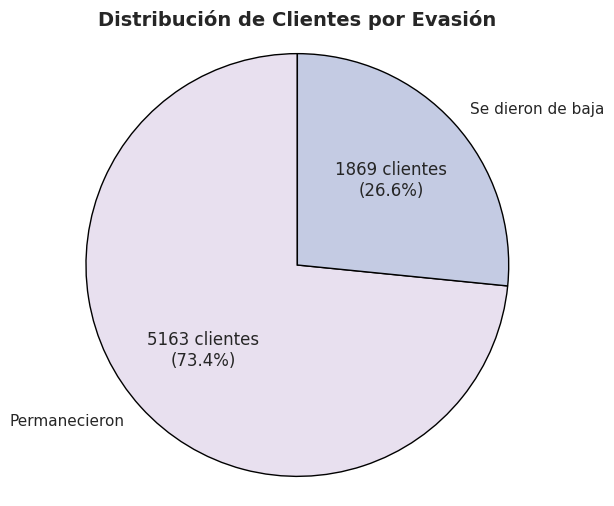

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns


valor_churn = datos_limpio['Churn'].value_counts()


porcentajes = valor_churn / valor_churn.sum() * 100


plt.figure(figsize=(6, 6))
sns.set_theme(style="white")
etiquetas = ['Permanecieron', 'Se dieron de baja']
colores = sns.color_palette("PuBuGn")[:2]


plt.pie(
    porcentajes,
    labels=etiquetas,
    colors=colores,
    startangle=90,
    autopct=lambda x: f'{int(round(x * sum(valor_churn)/100))} clientes\n({x:.1f}%)',
    wedgeprops=dict(edgecolor='black', linewidth=1)
)


plt.axis('equal')
plt.title('Distribución de Clientes por Evasión', fontsize=14, fontweight='bold')
plt.savefig('grafico_churn.png', dpi=300, bbox_inches='tight')
plt.show()

## Recuento de evasión por variables categóricas

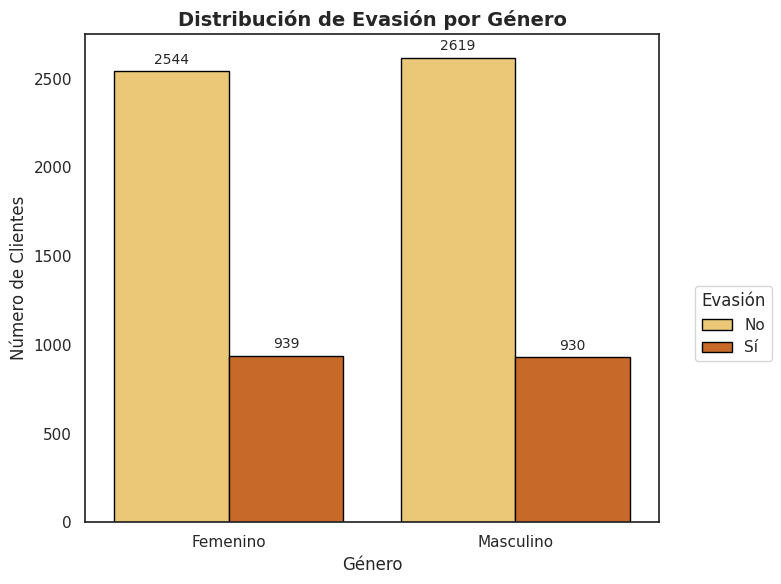

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns


traducciones_genero = {
    'Female': 'Femenino',
    'Male': 'Masculino'
}


df_temp = datos_limpio.copy()
df_temp['gender'] = df_temp['gender'].map(traducciones_genero)


plt.figure(figsize=(8, 6))
sns.countplot(
    data=df_temp,
    x='gender',
    hue='Churn',
    palette=sns.color_palette("YlOrBr", n_colors=2),
    edgecolor='black'
)
plt.title('Distribución de Evasión por Género', fontsize=14, fontweight='bold')
plt.xlabel('Género', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Evasión', labels=['No', 'Sí'], bbox_to_anchor=(1.05, 0.5), loc='upper left')
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%d', label_type='edge', padding=3, fontsize=10)
plt.tight_layout()
plt.savefig('evasion_genero.png', dpi=300, bbox_inches='tight')
plt.show()

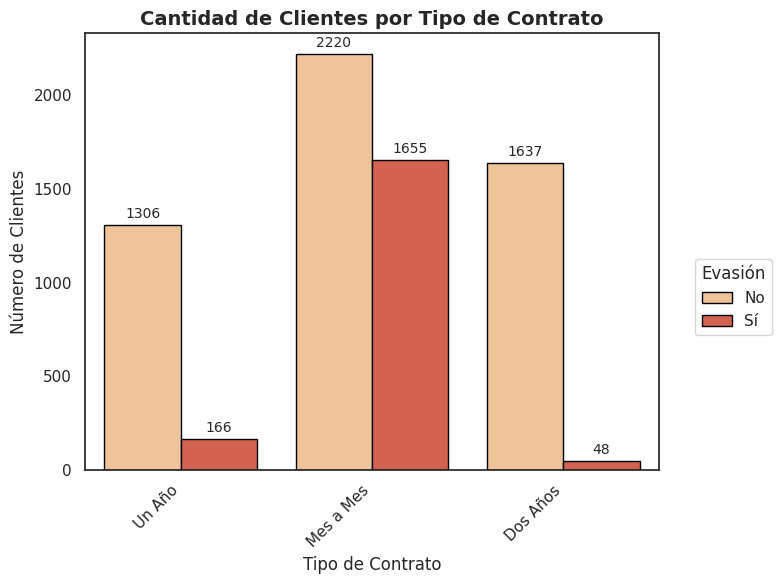

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns


traducciones_contrato = {
    'Month-to-month': 'Mes a Mes',
    'One year': 'Un Año',
    'Two year': 'Dos Años'
}


df_temp = datos_limpio.copy()
df_temp['Contract'] = df_temp['Contract'].map(traducciones_contrato)


plt.figure(figsize=(8, 6))
sns.countplot(
    data=df_temp,
    x='Contract',
    hue='Churn',
    palette=sns.color_palette("OrRd", n_colors=2),
    edgecolor='black'
)
plt.title('Cantidad de Clientes por Tipo de Contrato', fontsize=14, fontweight='bold')
plt.xlabel('Tipo de Contrato', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Evasión', labels=['No', 'Sí'], bbox_to_anchor=(1.05, 0.5), loc='upper left')
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%d', label_type='edge', padding=3, fontsize=10)
plt.tight_layout()
plt.savefig('evasion_tipo_contrato.png', dpi=300, bbox_inches='tight')
plt.show()

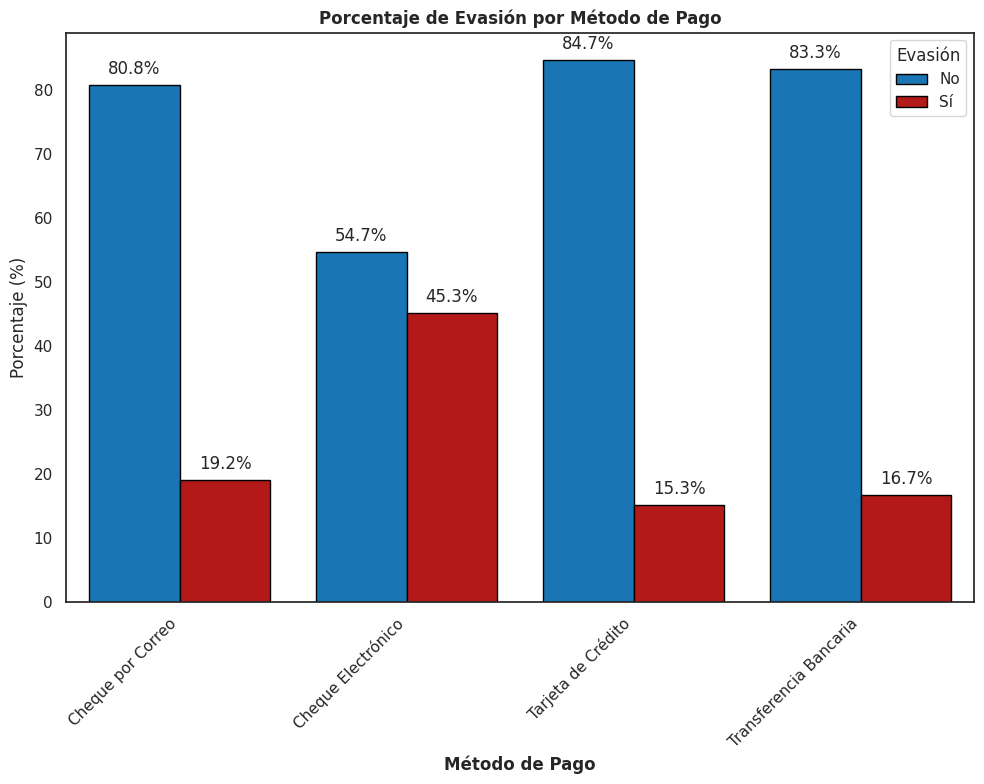

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns



traducciones_pago = {
    'Electronic check': 'Cheque Electrónico',
    'Mailed check': 'Cheque por Correo',
    'Bank transfer (automatic)': 'Transferencia Bancaria',
    'Credit card (automatic)': 'Tarjeta de Crédito'
}


datos = []
for metodo in datos_limpio['PaymentMethod'].unique():

    metodo_trad = traducciones_pago.get(metodo, metodo)

    total = len(datos_limpio[datos_limpio['PaymentMethod'] == metodo])
    no = len(datos_limpio[(datos_limpio['PaymentMethod'] == metodo) & (datos_limpio['Churn'] == 'No')])
    si = len(datos_limpio[(datos_limpio['PaymentMethod'] == metodo) & (datos_limpio['Churn'] == 'Yes')])

    datos.append([metodo_trad, 'No', (no/total)*100])
    datos.append([metodo_trad, 'Sí', (si/total)*100])

df = pd.DataFrame(datos, columns=['Método', 'Churn', 'Porcentaje'])

plt.figure(figsize=(10, 8))
ax = sns.barplot( data=df,
    x='Método',
    y='Porcentaje',
    hue='Churn',
    palette={'No': '#007ACC', 'Sí': '#CC0000'},
    edgecolor='black'
)

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', padding=5)

plt.title('Porcentaje de Evasión por Método de Pago', fontweight='bold')
plt.xlabel('Método de Pago', fontweight='bold')
plt.ylabel('Porcentaje (%)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Evasión', loc='upper right')
plt.tight_layout()
plt.savefig('evasion_metodo_pago.png', dpi=300, bbox_inches='tight')
plt.show()

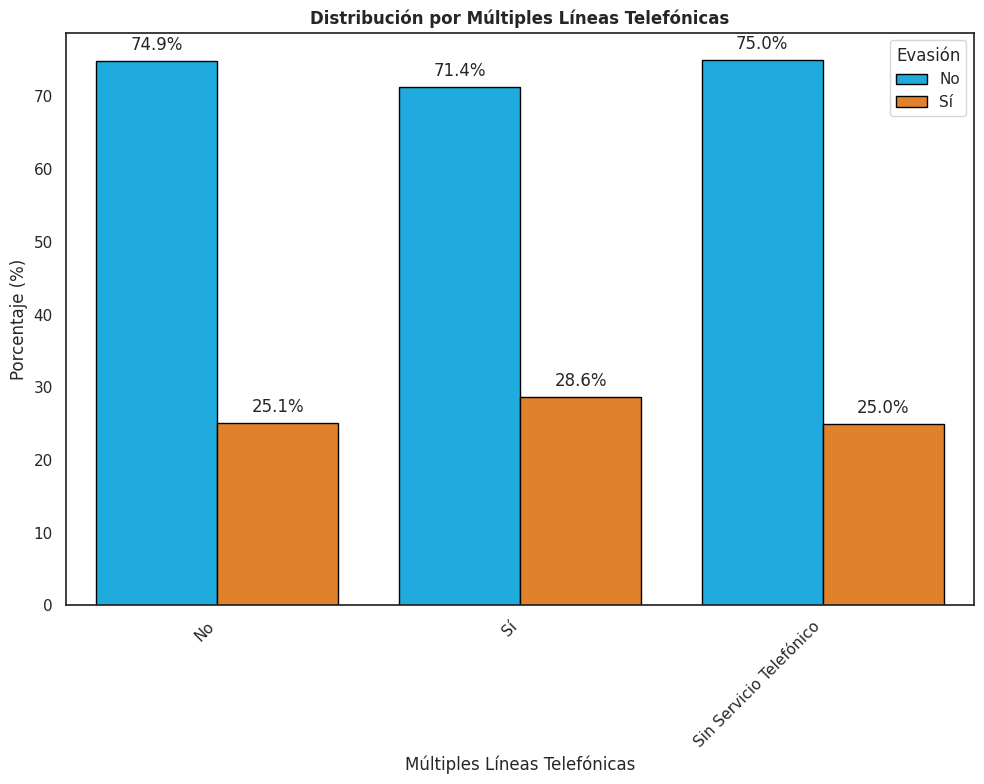

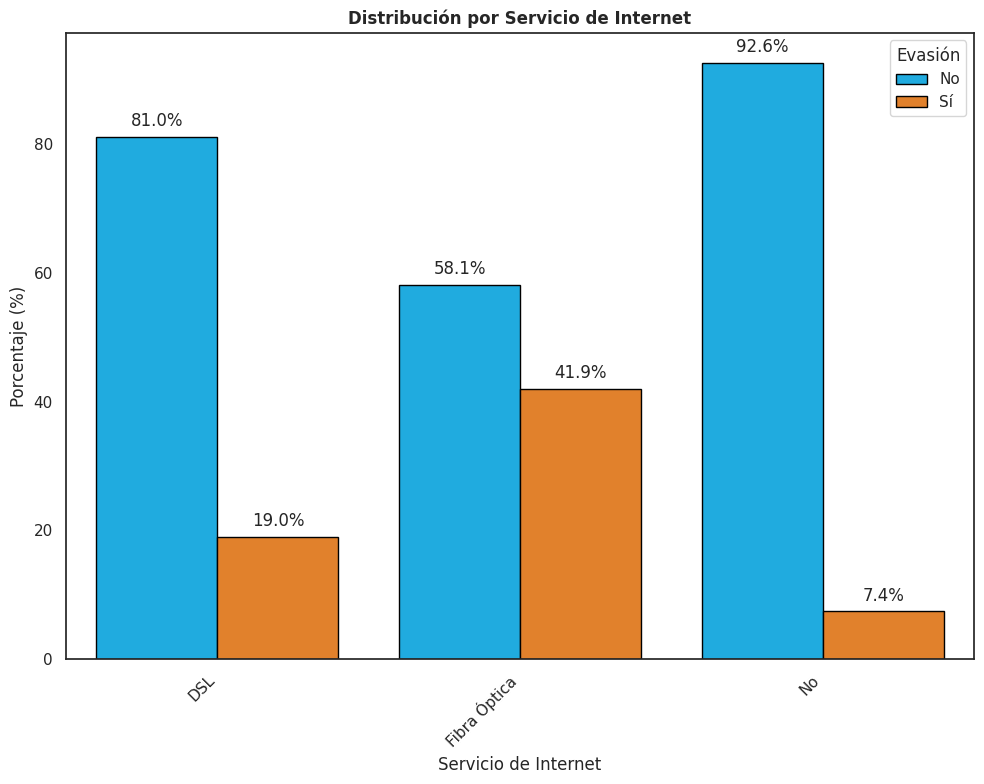

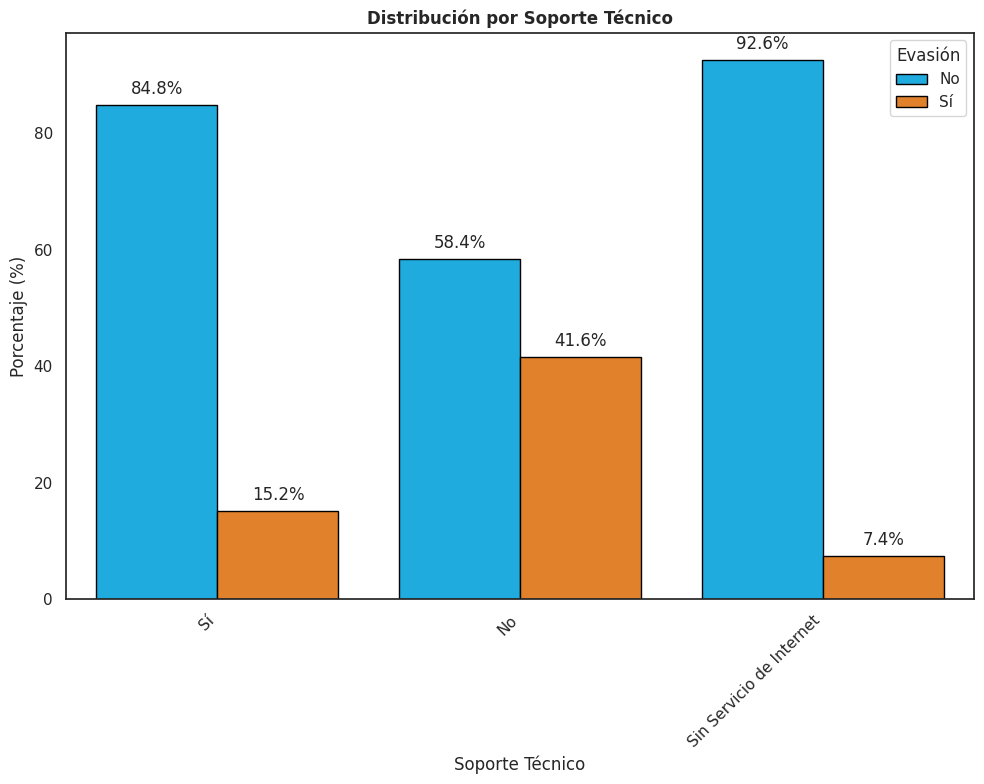

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns



traducciones_opciones = {
    'Yes': 'Sí',
    'No': 'No',
    'No phone service': 'Sin Servicio Telefónico',
    'Fiber optic': 'Fibra Óptica',
    'DSL': 'DSL',
    'No internet service': 'Sin Servicio de Internet'
}

columnas_horizontales = ['MultipleLines', 'InternetService', 'TechSupport']
ejex = {
    'MultipleLines': 'Múltiples Líneas Telefónicas',
    'InternetService': 'Servicio de Internet',
    'TechSupport': 'Soporte Técnico'
}

contador = 1

for col in columnas_horizontales:

    datos = []
    for opcion in datos_limpio[col].unique():
        total = len(datos_limpio[datos_limpio[col] == opcion])
        no = len(datos_limpio[(datos_limpio[col] == opcion) & (datos_limpio['Churn'] == 'No')])
        si = len(datos_limpio[(datos_limpio[col] == opcion) & (datos_limpio['Churn'] == 'Yes')])


        datos.append([traducciones_opciones.get(opcion, opcion), 'No', (no/total)*100])
        datos.append([traducciones_opciones.get(opcion, opcion), 'Sí', (si/total)*100])


    df = pd.DataFrame(datos, columns=['Opción', 'Churn', 'Porcentaje'])


    plt.figure(figsize=(10, 8))
    ax = sns.barplot(
        data=df,
        x='Opción',
        y='Porcentaje',
        hue='Churn',
        palette={'No': '#00baff', 'Sí': '#ff7f0e'},
        edgecolor='black'
    )


    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', padding=5)


    plt.title(f'Distribución por {ejex[col]}', fontweight='bold')
    plt.xlabel(ejex[col])
    plt.ylabel('Porcentaje (%)')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Evasión')
    plt.tight_layout()

    nombres_archivo = f"evasion_lineas_telefonicas{contador}.png"
    plt.savefig(nombres_archivo, dpi=300, bbox_inches='tight')
    plt.show()

    contador += 1

## Conteo de evasión por variables numéricas

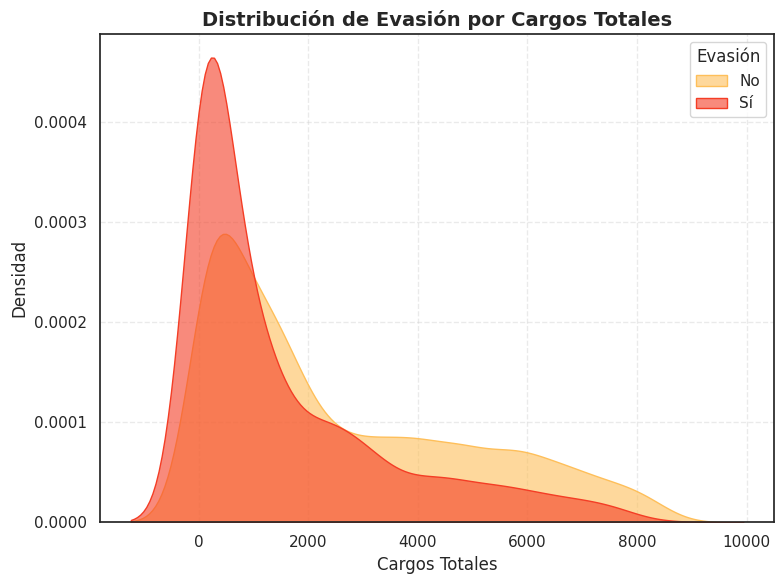

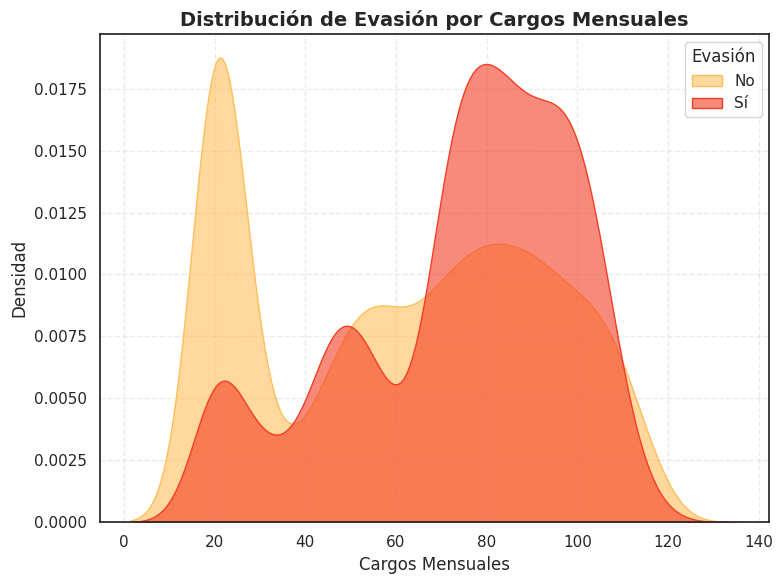

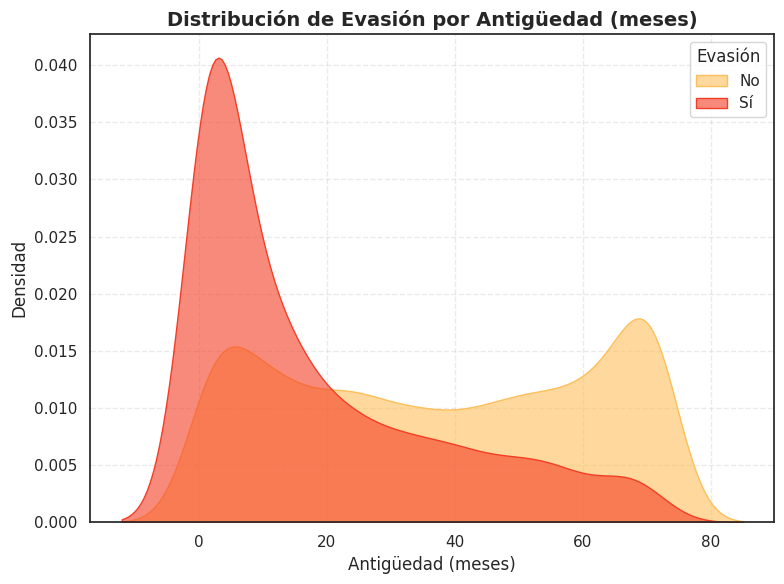

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns


traducciones_densi = {
    'tenure': 'Antigüedad (meses)',
    'Charges.Monthly': 'Cargos Mensuales',
    'Charges.Total': 'Cargos Totales'
}

variables_densi = ['Charges.Total','Charges.Monthly' ,'tenure']

contador = 1
for var in variables_densi:
    plt.figure(figsize=(8, 6))

    sns.kdeplot( data=datos_limpio[datos_limpio['Churn'] == 'No'],
        x=var,
        label='No',
        fill=True,
        color=sns.color_palette("YlOrRd", n_colors=2)[0],
        alpha=0.6
    )

    sns.kdeplot( data=datos_limpio[datos_limpio['Churn'] == 'Yes'],
        x=var,
        label='Sí',
        fill=True,
        color=sns.color_palette("YlOrRd", n_colors=2)[1],
        alpha=0.6
    )


    nombres_traducido = traducciones_densi.get(var, var)
    plt.title(f'Distribución de Evasión por {nombres_traducido}', fontsize=14, fontweight='bold')
    plt.xlabel(nombres_traducido, fontsize=12)
    plt.ylabel('Densidad', fontsize=12)
    plt.legend(title='Evasión', loc='upper right')
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.tight_layout()
    nombres_archivo = f"evasion_variables_numericas{contador}.png"
    plt.savefig(nombres_archivo, dpi=300, bbox_inches='tight')
    plt.show()

    contador += 1

#📄Informe final

## 🔹 Introducción:




El presente informe detalla y tiene como objetivo identificar los factores que influyen o provocan la evasion de clientes de una empresa de telecomunicaciones  (Telecom X). Siendo un problema critico esta perdida de clientes para la sostenibilidad regular de la empresa. Para esto a traves de un estudio y analisis de datos, se busca identificar patrones de comportamiento asociados a la decision de abandono del servicio, generar insight para diseñar estrategias y evaluar variables especificas que pueden impactar en la tasa de clientes propensos a irse.

La comprensión de estas razones es fundamental para implementar estrategias de retención efectivas y reducir la pérdida de clientes.

## 🔹 Limpieza y Tratamiento de Datos:

Este proceso inicial se ejecutó para preparar los datos y garantizar su calidad, conteniendo los siguientes pasos:


*   Se importó datos desde una API de Telecom X mediante un lector de archivos JSON utilizando Pandas.
*   Como el dataset inicialmente contenía columnas con estructuras JSON anidadas, se llevó a cabo una normalizacion para extraer la información en columnas individuales.
*   Se limpió el DataFrame mediante diferentes métodos; Uno de ellos fue el tratamiento por datos nulos y datos duplicados donde no se encontraron problemas.
*   El otro metodo de limpieza fue el analizar las inconsitencias en categorias especificas, donde se encontraron cadenas vacias en dos categorias y errores de tipo en una, las cuales fueron eliminadas y modificadas preferentemente.
*   Por ultimo se creo una nueva variable "Cuentas_diarias" a partir de los pagos mensuales.







## 🔹 Análisis Exploratorio de Datos:

Con los datos finalmente limpios y estructurados, se inició el análisis exploratorio sobre los factores asociados a la cancelación de servicios por parte de los clientes.



**1.   En el analisis de la variable "Churn"(evasión) se encontró la siguiente desigualdad que nos permitirá enteder el tamaño de gravedad del problema existente:**

Se observó que aproximadamente 26.6% de los clientes han cancelado el servicio.


*   Clientes que cancelaron: 1869 (26.6%)
*   Clientes que No cancelaron: 5163 (73.4%)




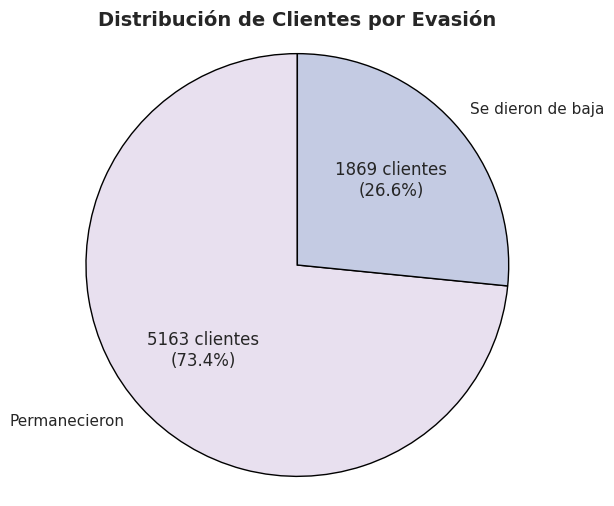




**2.   Recuento de Evasión por Variables Categóricas**




*   **Género:** Los hombres tienen una tasa de churn ligeramente mayor, por lo tanto es prácticamente la misma para hombres y mujeres, indicando que el género no es un factor diferenciador.







*   **Metodos de pago:** Ciertos métodos están más asociados con cancelaciones, como por ejemplo el "Cheque electronico" que lidera desfavorablemente con 45.3%

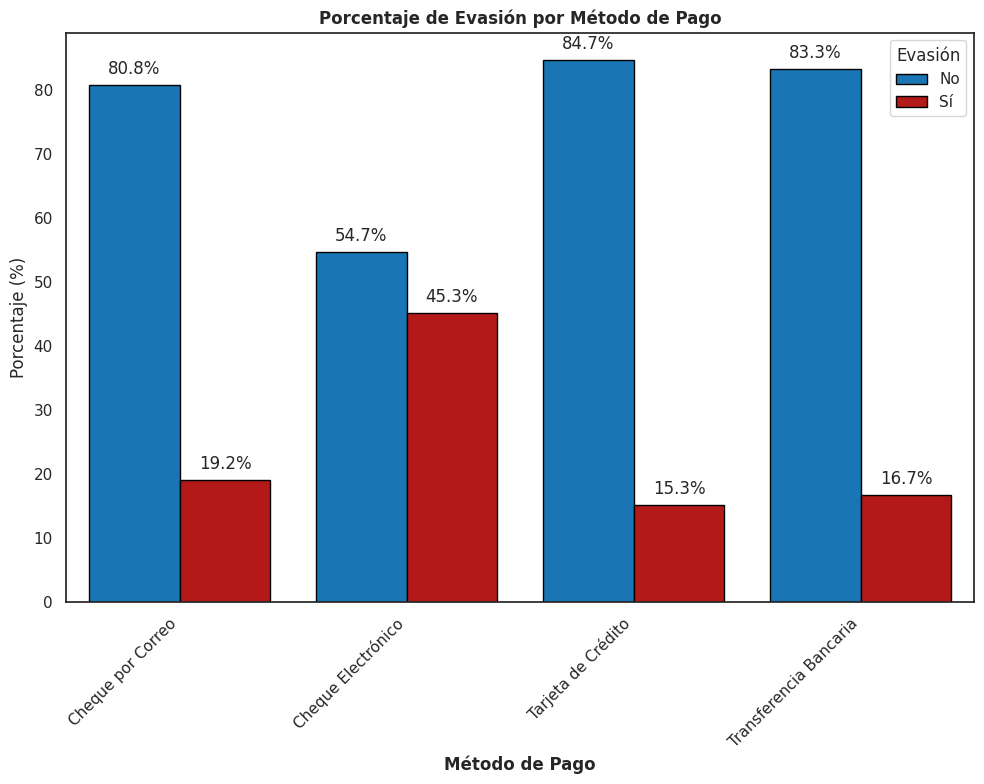







*   **Tipo de Contrato:** Se observa una tasa de evasión marcadamente más alta en los clientes con contrato "Mes a Mes", presentando una mayor tasa de cancelación, mientras que los contratos anuales o bianuales se asocian a mayor permanencia.

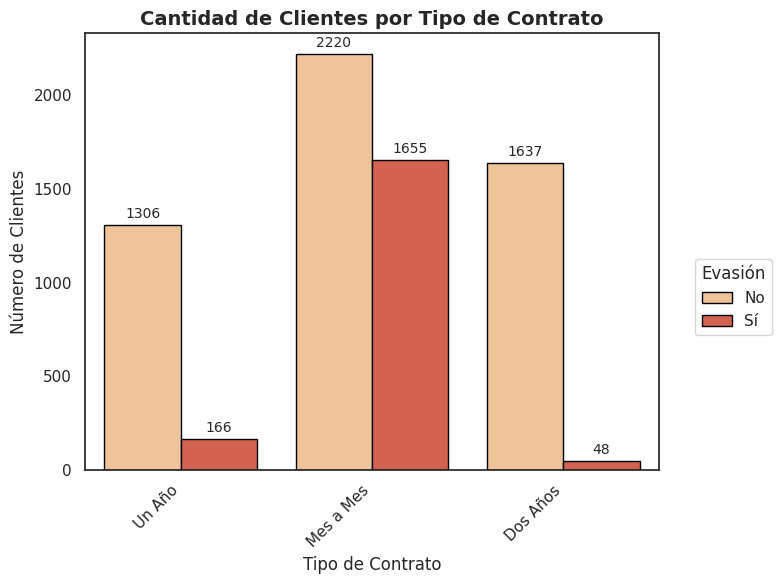




**3. Conteo de Evasión por Variables Numéricas:**





*   **Cargos Mensuales y Totales:** Los clientes que abandonan el servicio suelen llevar menos tiempo en la compañía, aunque no cancelan inmediatamente, los usuarios con tarifas elevadas y poca fidelización terminan abandonando el servicio en menos de un año. Los cargos mensuales altos están asociados a mayor riesgo de fuga ya que es posible que los clientes perciban que el servicio no justifica el costo o que sea muy excesivo.


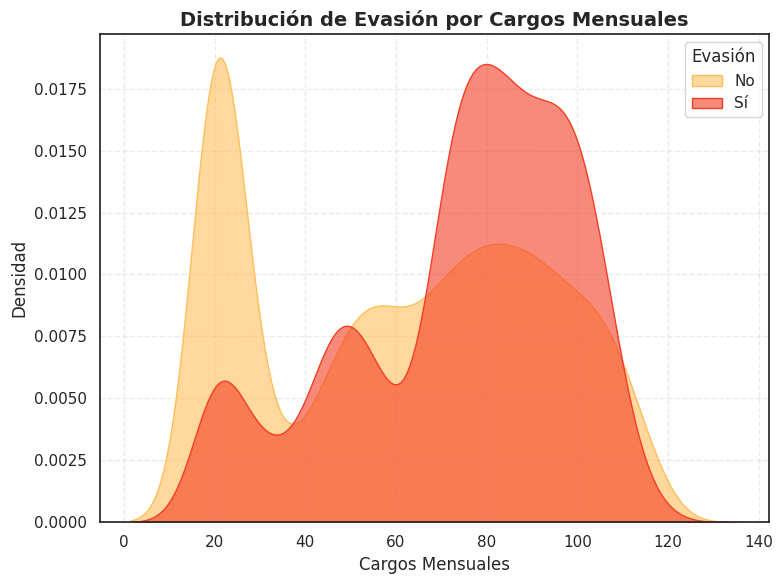

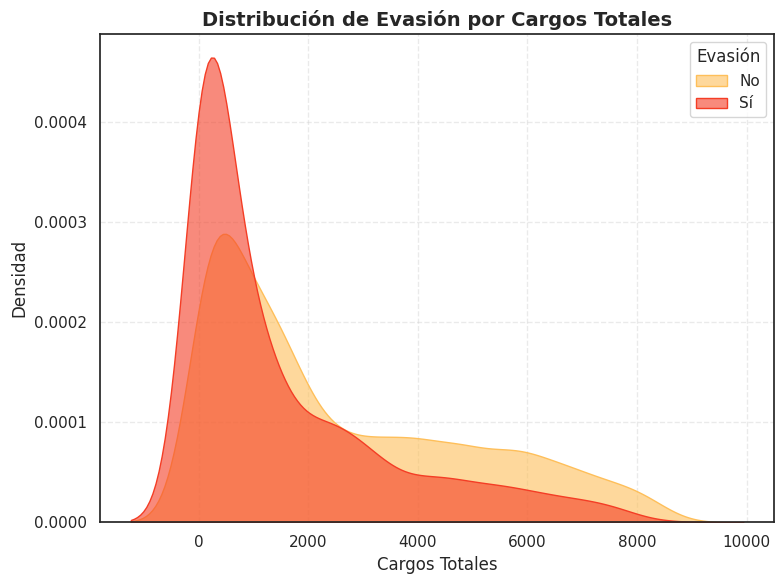




*    **Antiguedad:** Los clientes que cancelan suelen gastar menos y llevar menos tiempo en la compañía osea que tienden a tener una antigüedad mucho menor. La mayoría de las cancelaciones ocurren en los primeros meses de servicio.

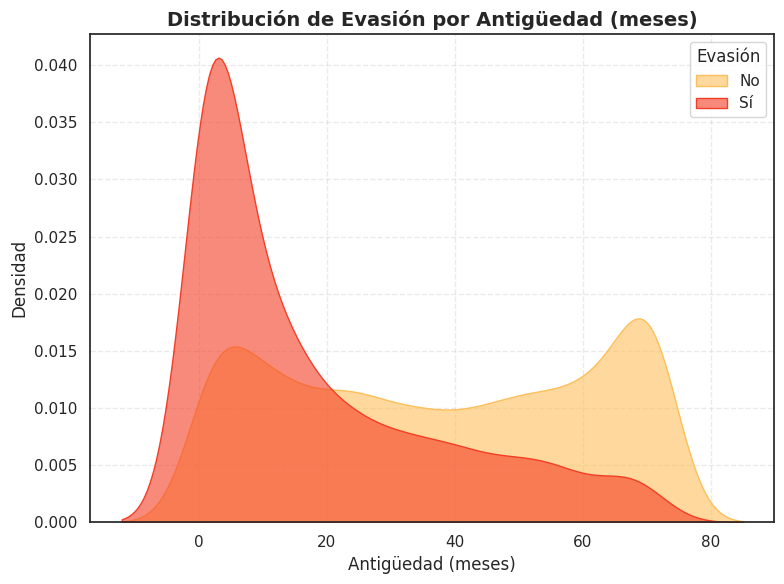



## 🔹 Conclusiones e Insights:

Una vez realizado el análisis exploratorio de datos, los principales hallazgos son:



*   Los contratos cortos y pagos manuales aumentan el churn


*   El método de pago y el tipo de contrato son factores especialmente influyentes, por que los clientes que usan el pago con cheque electrónico tienen mayor tasa de cancelación.


*   La lealtad del cliente aumenta con el tiempo, por lo que retener clientes en los primeros meses es fundamental.


*   El coste diario y el pago mensual están positivamente correlacionados con la cancelación, lo que sugiere que los clientes con tarifas más altas o percepciones de coste elevado son más propensos a abandonar el servicio.


*   Los pagos electrónicos son más propensos a abandonar, por lo tanto la factura electrónica podría estar asociada con un perfil de cliente más crítico o digitalizado, con menor lealtad.






## 🔹 Recomendaciones:




*   Incentivar el uso de métodos de pago automáticos, ya que se asocian a menor churn.


*   Ofrecer asesoría personalizada a adultos mayores para reducir evasión por falta de uso o dificultades técnicas.


*   Filtrar a los clientes con más riesgo de fuga para aplicar estrategias de retención personalizadas.


*   Mejorar la experiencia del cliente en los primeros meses mediante atención proactiva y servicios personalizados.


*   Investigar la experiencia digital de los usuarios que reciben factura electrónica para ver si tienen dificultades.


*   Monitorear activamente a los clientes con alto coste diario o mensual, ya que presentan mayor riesgo de cancelación y ver la posibilidad de ofrecerles descuentos personalizados.


*   Revisar la estrategia de precios y percepción de valor.


*   Controlar continuamente para detectar cambios en los patrones y ajustar las estrategias de retención preferentemente





